In [1]:
from bs4 import NavigableString, Comment
from bs4 import BeautifulSoup
import os
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = "https://winetime.com.ua/ua/wine"

In [4]:
wines_data = []

In [5]:
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
total_count = soup.select_one('span.total-catalog-items').text
total_pages = round(int(total_count)/30)

In [6]:
colum_names = ['Назва',
                'Виробник',
                'Артикул',
                'Ціна',
                'Температура подачі',
                'Сорти винограду',
                'Технологія виробництва',
                'Об `єм',
                'Рік',
                'Бренд',
                'Регіон',
                'Країна',
                'Солодкість',
                'Тип напою',
                'Колір вина',
                'Склад землі',
                'З чим подавати',
                'Класифікація',
                'Розміщення виноградників',
                'Витримка',
                'Склад винограду',
                'Цукор',
                'Алкоголь, %',
                'Збір урожаю',
                'Розширений колір вина',
                'Аромат',
                'Смак',
                'Цікаве',
                'Стиль вин',
                'Потенціал',
                'Дегустації']

In [7]:
colum_names_english = ['Title',
                'Producer',
                'Vendor_code',
                'Price',
                'Temperature',
                'Grape',
                'Technology',
                'Volume',
                'Year',
                'Brand',
                'Region',
                'Country',
                'Sweetness',
                'Type',
                'Color',
                'Soil',
                'Serve_with',
                'Classification',
                'Vineyards_placement',
                'Endurance',
                'Grapes_composition',
                'Sweet',
                'Alcohol',
                'Harvest',
                'Additional_color',
                'Aroma',
                'Taste',
                'Interesting',
                'Style',
                'Potential',
                'Degustations']

In [8]:
# for page in range(1, total_pages + 1):
#   print(f'Page processing: {page} of {total_pages}')
#   new_page_url = url + f"?page={page}"
#   page = requests.get(new_page_url)
#   soup = BeautifulSoup(page.content, 'html.parser')
#   products = soup.select_one('div.catalog-list-wrapper').select('div.products-main-slider-item')

#   for i in range(0, len(products)):
#     product = products[i]
#     product_url = product.select_one('a')['href'] + "#description"
#     item_page = requests.get(product_url)
#     item_soup = BeautifulSoup(item_page.content, 'html.parser')

#     description_soup = item_soup.select_one("div.description-tab")
#     title = description_soup.select_one('div.item-list-title')
#     title_text = title.text.strip() if title else ''

#     print(f"{title_text}: {product_url}")

#     subtitle = description_soup.select_one('div.item-list-subtitle')
#     subtitle_text = subtitle.text.strip() if subtitle else ''

#     vendor_code = description_soup.select_one('div.vendor-code').select_one('span')
#     vendor_code_text = vendor_code.text.strip() if vendor_code else ''

#     price = description_soup.select_one('div.own-bottom').select_one('span')
#     price_text = price.text.strip() if price else ''

#     tables = item_soup.select('table.char-item-table')
#     wine = dict.fromkeys(colum_names)
#     wine['Назва'] = title_text
#     wine['Виробник'] = subtitle_text
#     wine['Артикул'] = vendor_code
#     wine['Ціна'] = price_text

#     for table in tables:
#       rows = table.select('tr')
#       for row in rows:
#         row_name = row.select_one('td.first-char-title').text.strip()
#         row_value = row.select_one('td.second-char-title').text.strip()
#         wine[row_name] = row_value

#     wines_data.append(wine)
#   df = pd.DataFrame(wines_data)
#   df.to_csv("/content/drive/MyDrive/Colab Notebooks/Projector/ML/wines.csv", mode='w+')

In [234]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projector/ML/wines.csv", index_col=0)

In [235]:
df.head()

,Назва,Виробник,Артикул,Ціна,Температура подачі,Сорти винограду,Технологія виробництва,Об `єм,Рік,Бренд,...,Цукор,"Алкоголь, %",Збір урожаю,Розширений колір вина,Аромат,Смак,Цікаве,Стиль вин,Потенціал,Дегустації
0,Вино сухе біле Dominio de Punctum Viento Alise...,Dominio de Punctum,<span>15055373</span>,439 грн,8°C,віоньє,Вино виробляють за принципами «живого» господа...,"0,75 л",2022.0,Dominio de Punctum,...,1 г/л,13.0,Виноград збирають вночі.,Яскравий золотистий зі відблисками лайму.,Насичений із нотами запашних квітів.,Збалансований з нотами магнолії і персикового ...,NaN,NaN,NaN,NaN
1,Вино напівсолодке червоне Castelnuovo Vino Ros...,Castelnuovo,<span>10369400</span>,217 грн,14-15°C,"корвіна, рондінелла",NaN,"0,75 л",NaN,Castelnuovo,...,35 г/л,11.0,NaN,Багатий рубіновий.,Освіжаючий букет з нотками полуниці та смородини.,"Вишуканий, солодкий смак з привабливим освіжаю...",NaN,NaN,NaN,NaN
2,"Вино сухе червоне Vintae El Picaro 0,75 л",Vintae,<span>15426282</span>,557 грн,16-18°C,тінта де торо,Біодинамічний спосіб ведення господарства. Фер...,"0,75 л",2022.0,Vintae,...,2.4 г/л,14.5,"Добірний урожай з 90-100-річних лоз, зібраний ...","Насичений, глибокий рубіновий.",Інтенсивний соковитий аромат темних ягід (чорн...,"Теплий, соковитий смак, в якому домінують стиг...",На етикетках вин Matsu зображені фотографії ви...,NaN,NaN,NaN
3,Вино сухе біле Dominio de Punctum Viento Alise...,Dominio de Punctum,<span>15055373</span>,439 грн,8°C,віоньє,Вино виробляють за принципами «живого» господа...,"0,75 л",2022.0,Dominio de Punctum,...,1 г/л,13.0,Виноград збирають вночі.,Яскравий золотистий зі відблисками лайму.,Насичений із нотами запашних квітів.,Збалансований з нотами магнолії і персикового ...,NaN,NaN,NaN,NaN
4,Вино напівсолодке червоне Castelnuovo Vino Ros...,Castelnuovo,<span>10369400</span>,217 грн,14-15°C,"корвіна, рондінелла",NaN,"0,75 л",NaN,Castelnuovo,...,35 г/л,11.0,NaN,Багатий рубіновий.,Освіжаючий букет з нотками полуниці та смородини.,"Вишуканий, солодкий смак з привабливим освіжаю...",NaN,NaN,NaN,NaN


Rename columns to more readable

In [236]:
df = df.rename(columns=dict(zip(colum_names, colum_names_english)))
df

,Title,Producer,Vendor_code,Price,Temperature,Grape,Technology,Volume,Year,Brand,...,Sweet,Alcohol,Harvest,Additional_color,Aroma,Taste,Interesting,Style,Potential,Degustations
0,Вино сухе біле Dominio de Punctum Viento Alise...,Dominio de Punctum,<span>15055373</span>,439 грн,8°C,віоньє,Вино виробляють за принципами «живого» господа...,"0,75 л",2022.0,Dominio de Punctum,...,1 г/л,13.0,Виноград збирають вночі.,Яскравий золотистий зі відблисками лайму.,Насичений із нотами запашних квітів.,Збалансований з нотами магнолії і персикового ...,NaN,NaN,NaN,NaN
1,Вино напівсолодке червоне Castelnuovo Vino Ros...,Castelnuovo,<span>10369400</span>,217 грн,14-15°C,"корвіна, рондінелла",NaN,"0,75 л",NaN,Castelnuovo,...,35 г/л,11.0,NaN,Багатий рубіновий.,Освіжаючий букет з нотками полуниці та смородини.,"Вишуканий, солодкий смак з привабливим освіжаю...",NaN,NaN,NaN,NaN
2,"Вино сухе червоне Vintae El Picaro 0,75 л",Vintae,<span>15426282</span>,557 грн,16-18°C,тінта де торо,Біодинамічний спосіб ведення господарства. Фер...,"0,75 л",2022.0,Vintae,...,2.4 г/л,14.5,"Добірний урожай з 90-100-річних лоз, зібраний ...","Насичений, глибокий рубіновий.",Інтенсивний соковитий аромат темних ягід (чорн...,"Теплий, соковитий смак, в якому домінують стиг...",На етикетках вин Matsu зображені фотографії ви...,NaN,NaN,NaN
3,Вино сухе біле Dominio de Punctum Viento Alise...,Dominio de Punctum,<span>15055373</span>,439 грн,8°C,віоньє,Вино виробляють за принципами «живого» господа...,"0,75 л",2022.0,Dominio de Punctum,...,1 г/л,13.0,Виноград збирають вночі.,Яскравий золотистий зі відблисками лайму.,Насичений із нотами запашних квітів.,Збалансований з нотами магнолії і персикового ...,NaN,NaN,NaN,NaN
4,Вино напівсолодке червоне Castelnuovo Vino Ros...,Castelnuovo,<span>10369400</span>,217 грн,14-15°C,"корвіна, рондінелла",NaN,"0,75 л",NaN,Castelnuovo,...,35 г/л,11.0,NaN,Багатий рубіновий.,Освіжаючий букет з нотками полуниці та смородини.,"Вишуканий, солодкий смак з привабливим освіжаю...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,Вино сухе червоне Castello di Monsanto Nemo To...,Castello di Monsanto,<span>09737147</span>,Не вказана,16-18°C,каберне совіньйон,ферментація у чанах з нержавіючої сталі при ко...,"0,75 л",2006.0,Castello di Monsanto,...,"1,5 г/л",14.0,100% вручну,гранатовый,Фруктовий.,"Достатньо терпкий, стійкий.",NaN,NaN,NaN,NaN
4861,Вино сухе червоне Mastrojanni Brunello di Mont...,Mastrojanni,<span>10660083</span>,Не вказана,16-18°C,санджовезе,Виноград відділяють від гребенів та ретельно с...,"0,375 л",2006.0,Mastrojanni,...,"1,9 г/л",14.5,NaN,Насичений рубіновий із малиновими та гранатови...,"Сповнений нотами сухих червоних фруктів, пряно...",Витончений та елегантний спочатку та неймовірн...,NaN,NaN,NaN,NaN
4862,Вино сухе червоне Symington Altano Douro Quint...,Symington Family Estates,<span>09452658</span>,Не вказана,16-18°C,"туріга франка, туріга насьональ",NaN,"0,75 л",2008.0,Symington Family Estates,...,"2,2 г/л",14.0,NaN,гранатовый,"Квітковий, з нотками сушеної фіалки, троянди і...","Витончений, м'який, з присмаком чорної сливи, ...",NaN,NaN,NaN,NaN
4863,Вино сухе біле Maison Louis Latour Puligny-Mon...,Maison Louis Latour,<span>13167089</span>,Не вказана,10-12°C,шардоне,Класична вініфікація в дубових діжках з повною...,"0,75 л",2010.0,Maison Louis Latour,...,"2,3 г/л",13.5,Збір вручну.,солом'яний,"Помаранч, яблуко, квіти.","Багатий, екзотичний, фруктовий.",NaN,NaN,NaN,NaN


Preprocess cluttered data

In [237]:
df['Vendor_code'] = df['Vendor_code'].str.replace(r'<[^<>]*>', '', regex=True)
df['Volume'] = df['Volume'].str.split(' ').str[0]
df['Sweet'] = df['Sweet'].str.split(' ').str[0]
df['Sweet'] = df['Sweet'].str.replace(',', '.')
df['Sweet'] = pd.to_numeric(df['Sweet'], errors='coerce')
df['Price'] = df['Price'].str.split(' ').str[0]
df['Temperature'] = df['Temperature'].str.replace('°C', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Volume'] = df['Volume'].str.replace(',', '.')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

In [238]:
df

,Title,Producer,Vendor_code,Price,Temperature,Grape,Technology,Volume,Year,Brand,...,Sweet,Alcohol,Harvest,Additional_color,Aroma,Taste,Interesting,Style,Potential,Degustations
0,Вино сухе біле Dominio de Punctum Viento Alise...,Dominio de Punctum,15055373,439.0,8,віоньє,Вино виробляють за принципами «живого» господа...,0.750,2022.0,Dominio de Punctum,...,1.0,13.0,Виноград збирають вночі.,Яскравий золотистий зі відблисками лайму.,Насичений із нотами запашних квітів.,Збалансований з нотами магнолії і персикового ...,NaN,NaN,NaN,NaN
1,Вино напівсолодке червоне Castelnuovo Vino Ros...,Castelnuovo,10369400,217.0,14-15,"корвіна, рондінелла",NaN,0.750,NaN,Castelnuovo,...,35.0,11.0,NaN,Багатий рубіновий.,Освіжаючий букет з нотками полуниці та смородини.,"Вишуканий, солодкий смак з привабливим освіжаю...",NaN,NaN,NaN,NaN
2,"Вино сухе червоне Vintae El Picaro 0,75 л",Vintae,15426282,557.0,16-18,тінта де торо,Біодинамічний спосіб ведення господарства. Фер...,0.750,2022.0,Vintae,...,2.4,14.5,"Добірний урожай з 90-100-річних лоз, зібраний ...","Насичений, глибокий рубіновий.",Інтенсивний соковитий аромат темних ягід (чорн...,"Теплий, соковитий смак, в якому домінують стиг...",На етикетках вин Matsu зображені фотографії ви...,NaN,NaN,NaN
3,Вино сухе біле Dominio de Punctum Viento Alise...,Dominio de Punctum,15055373,439.0,8,віоньє,Вино виробляють за принципами «живого» господа...,0.750,2022.0,Dominio de Punctum,...,1.0,13.0,Виноград збирають вночі.,Яскравий золотистий зі відблисками лайму.,Насичений із нотами запашних квітів.,Збалансований з нотами магнолії і персикового ...,NaN,NaN,NaN,NaN
4,Вино напівсолодке червоне Castelnuovo Vino Ros...,Castelnuovo,10369400,217.0,14-15,"корвіна, рондінелла",NaN,0.750,NaN,Castelnuovo,...,35.0,11.0,NaN,Багатий рубіновий.,Освіжаючий букет з нотками полуниці та смородини.,"Вишуканий, солодкий смак з привабливим освіжаю...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,Вино сухе червоне Castello di Monsanto Nemo To...,Castello di Monsanto,09737147,NaN,16-18,каберне совіньйон,ферментація у чанах з нержавіючої сталі при ко...,0.750,2006.0,Castello di Monsanto,...,1.5,14.0,100% вручну,гранатовый,Фруктовий.,"Достатньо терпкий, стійкий.",NaN,NaN,NaN,NaN
4861,Вино сухе червоне Mastrojanni Brunello di Mont...,Mastrojanni,10660083,NaN,16-18,санджовезе,Виноград відділяють від гребенів та ретельно с...,0.375,2006.0,Mastrojanni,...,1.9,14.5,NaN,Насичений рубіновий із малиновими та гранатови...,"Сповнений нотами сухих червоних фруктів, пряно...",Витончений та елегантний спочатку та неймовірн...,NaN,NaN,NaN,NaN
4862,Вино сухе червоне Symington Altano Douro Quint...,Symington Family Estates,09452658,NaN,16-18,"туріга франка, туріга насьональ",NaN,0.750,2008.0,Symington Family Estates,...,2.2,14.0,NaN,гранатовый,"Квітковий, з нотками сушеної фіалки, троянди і...","Витончений, м'який, з присмаком чорної сливи, ...",NaN,NaN,NaN,NaN
4863,Вино сухе біле Maison Louis Latour Puligny-Mon...,Maison Louis Latour,13167089,NaN,10-12,шардоне,Класична вініфікація в дубових діжках з повною...,0.750,2010.0,Maison Louis Latour,...,2.3,13.5,Збір вручну.,солом'яний,"Помаранч, яблуко, квіти.","Багатий, екзотичний, фруктовий.",NaN,NaN,NaN,NaN


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4865 entries, 0 to 4864
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                4865 non-null   object 
 1   Producer             4304 non-null   object 
 2   Vendor_code          4865 non-null   object 
 3   Price                4065 non-null   float64
 4   Temperature          3911 non-null   object 
 5   Grape                4523 non-null   object 
 6   Technology           2590 non-null   object 
 7   Volume               4827 non-null   float64
 8   Year                 3736 non-null   float64
 9   Brand                4304 non-null   object 
 10  Region               3486 non-null   object 
 11  Country              4641 non-null   object 
 12  Sweetness            4762 non-null   object 
 13  Type                 4826 non-null   object 
 14  Color                4824 non-null   object 
 15  Soil                 2316 non-null   o

In [240]:
df['Classification'].unique()

array(['Indicazione Geografica Tipica (IGT)', nan, 'Toro DO', 'Kurant',
       'Denominazione di Origine Controllata (DOC)', 'Reserve',
       "Appellation d'Origine Controlee (AOC)", 'Vin de Table (VDT)',
       'Denominazione di Origine Controllata e Garantita (DOCG)',
       'Denominacion de Origen Calificada', 'Denominacion de Origen (DO)',
       'D.O. Carinena', 'KOP', 'Denominazione Di Origine Controllata',
       'Denomination of Origin', 'DOP', 'Appellation Bordeaux Contrelee',
       'витримане', 'Denominacion de Origen (D.O.)', 'Vin de Pays (VdP)',
       'DOCa Rioja', 'Indicazione Geografica Protette', 'DOC',
       'Appellation Alsace Controlee', 'Denominacao de Origine Protegida',
       'Qualitatswein',
       'Vino a Denominazione di Origine Controllata e Garantita (DOCG)',
       'DOC Douro', 'Denominazione Di Origine Controllata E Garantina',
       'D.O.C.G', 'IGP', 'Indication Geographique Protegee (IGP)',
       "Appellation d'Origine Protegee", 'Barolo D.O.C.G',
 

In [241]:
best_categories = ["PDO", "DOP", "AOP", "AOC", "VDQS", "DOCG", "DOC", "DO", "QmP",
                   "P.D.O", "D.O.P", "A.O.P", "A.O.C", "V.D.Q.S", "D.O.C.G", "D.O.C", "D.O", "Q.m.P",
                   "Denominacion de Origen Calificada", "Appellation", "Denominazione di Origine Controllata",
                   "Denominacao", "Denominazione", "Аppellation", "Appelalation", "Denominacion",
                   "Denomination", "Quali", "Origin", "Origen", "VSQ"]

region_categories = ["PGI", "IGP", "VdP", "VdT", "IGT", "VDT", "IPR", "Vinho Reginal", "QBA",
                     "P.G.I", "I.G.P", "V.d.P", "V.d.T", "I.G.T", "V.D.T", "I.P.R", "Q.B.A",
                     "Indicazione Geografica Tipica", "Indicazione Geografica Protette",
                     "Indication Geographique Protegee", "Geografica", "Regional", "Pays", "Vino de la Tierra"]

In [242]:
def get_category_by_classification(classification):
    if any(cat.lower() in str(classification).lower() for cat in best_categories):
      return "Best"
    if any(cat.lower() in str(classification).lower() for cat in region_categories):
      return "Region"
    if classification is not np.NaN:
      return "Ordinary"
    else:
      return classification

In [243]:
# df['Classification'].unique()
df['Classification_Category'] = df['Classification'].apply(get_category_by_classification)
df['Classification_Category']

0       Region
1          NaN
2         Best
3       Region
4          NaN
         ...  
4860    Region
4861      Best
4862      Best
4863      Best
4864       NaN
Name: Classification_Category, Length: 4865, dtype: object

In [244]:
df['Classification_Category'].nunique()

3

In [245]:
df['Classification_Category'].unique()

array(['Region', nan, 'Best', 'Ordinary'], dtype=object)

Remove rows with no 'Price' and fill Year, Sweet, Alcohol, Volume by the mode values

In [246]:
df.dropna(subset=['Price'], inplace=True)

df['Year'].fillna(df['Year'].mode()[0], inplace=True)
df['Sweet'].fillna(df['Sweet'].mode()[0], inplace=True)
df['Alcohol'].fillna(df['Alcohol'].mode()[0], inplace=True)
df['Volume'].fillna(df['Volume'].mode()[0], inplace=True)
df['Year'].fillna(df['Year'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4065 entries, 0 to 4071
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    4065 non-null   object 
 1   Producer                 3720 non-null   object 
 2   Vendor_code              4065 non-null   object 
 3   Price                    4065 non-null   float64
 4   Temperature              3312 non-null   object 
 5   Grape                    3816 non-null   object 
 6   Technology               1992 non-null   object 
 7   Volume                   4065 non-null   float64
 8   Year                     4065 non-null   float64
 9   Brand                    3720 non-null   object 
 10  Region                   2766 non-null   object 
 11  Country                  3926 non-null   object 
 12  Sweetness                3975 non-null   object 
 13  Type                     4031 non-null   object 
 14  Color                   

In [247]:
# df = df[df['Price']<3000]

In [248]:
# df[df['Country'].isnull()]

Change type of category columns to 'category'

In [249]:
df["Producer"].fillna("NA", inplace=True)
df['Producer'] = df['Producer'].astype('category')
df["Vendor_code"].fillna("NA", inplace=True)
df['Vendor_code'] = df['Vendor_code'].astype('category')
df["Brand"].fillna("NA", inplace=True)
df['Brand'] = df['Brand'].astype('category')
df["Region"].fillna("NA", inplace=True)
df['Region'] = df['Region'].astype('category')
df["Country"].fillna("NA", inplace=True)
df['Country'] = df['Country'].astype('category')
df["Type"].fillna("NA", inplace=True)
df['Type'] = df['Type'].astype('category')
df["Color"].fillna("NA", inplace=True)
df['Color'] = df['Color'].astype('category')
df["Style"].fillna("NA", inplace=True)
df['Style'] = df['Style'].astype('category')
df["Sweetness"].fillna("NA", inplace=True)
df['Sweetness'] = df['Sweetness'].astype('category')
df["Classification_Category"].fillna("NA", inplace=True)
df['Classification_Category'] = df['Classification_Category'].astype('category')

Grape is a list column so split it to a couple of columns

In [250]:
df['Grape'] = df['Grape'].str.split(',')

In [251]:
def split_list(row):
    return pd.Series(row['Grape'])

new_df = df.apply(split_list, axis=1).rename(columns=lambda x: f"Grape_{x+1}")

df = pd.concat([df, new_df], axis=1)

for (columnName, _) in df.items():
  if columnName.startswith('Grape_'):
    df[columnName].fillna("NA", inplace=True)
    df[columnName] = df[columnName].astype('category')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4065 entries, 0 to 4071
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Title                    4065 non-null   object  
 1   Producer                 4065 non-null   category
 2   Vendor_code              4065 non-null   category
 3   Price                    4065 non-null   float64 
 4   Temperature              3312 non-null   object  
 5   Grape                    3816 non-null   object  
 6   Technology               1992 non-null   object  
 7   Volume                   4065 non-null   float64 
 8   Year                     4065 non-null   float64 
 9   Brand                    4065 non-null   category
 10  Region                   4065 non-null   category
 11  Country                  4065 non-null   category
 12  Sweetness                4065 non-null   category
 13  Type                     4065 non-null   category
 14  Color   

In [253]:
# df.drop('Grape_3',axis=1, inplace=True)
# df.drop('Grape_4',axis=1, inplace=True)
# df.drop('Grape_5',axis=1, inplace=True)
# df.drop('Grape_6',axis=1, inplace=True)
# df.drop('Grape_7',axis=1, inplace=True)
# df.drop('Grape_8',axis=1, inplace=True)
# df.drop('Grape_9',axis=1, inplace=True)

In [254]:
target = ['Price']

numerical = [
    'Alcohol', 'Sweet', 'Year', 'Volume'
]

# categorical = [
#     'Country', 'Color', 'Type',
#     'Style', 'Sweetness'
# ]

categorical = [
    'Producer',
    'Region', 'Country', 'Color', 'Type',
    'Style', 'Sweetness', 'Classification_Category'
]

for (columnName, _) in df.items():
  if columnName.startswith('Grape_') and (int(columnName.split('_')[1]) < 3):
   categorical.append(columnName)

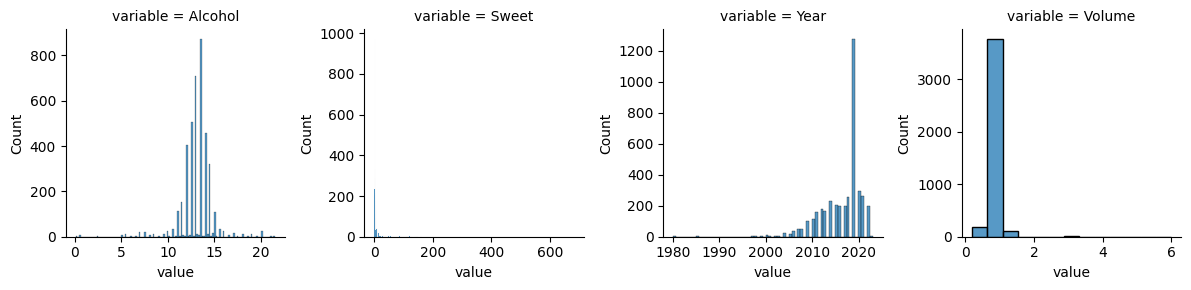

In [255]:
# df.hist(figsize=(20, 20));
temp = pd.melt(df.drop('Price',axis=1), value_vars=numerical);
grid = sns.FacetGrid(temp, col="variable",  col_wrap=5, aspect=1.0,sharex=False, sharey=False);
grid.map(sns.histplot, "value");
plt.show();

Text(0.5, 1.0, 'Mean Price by Country')

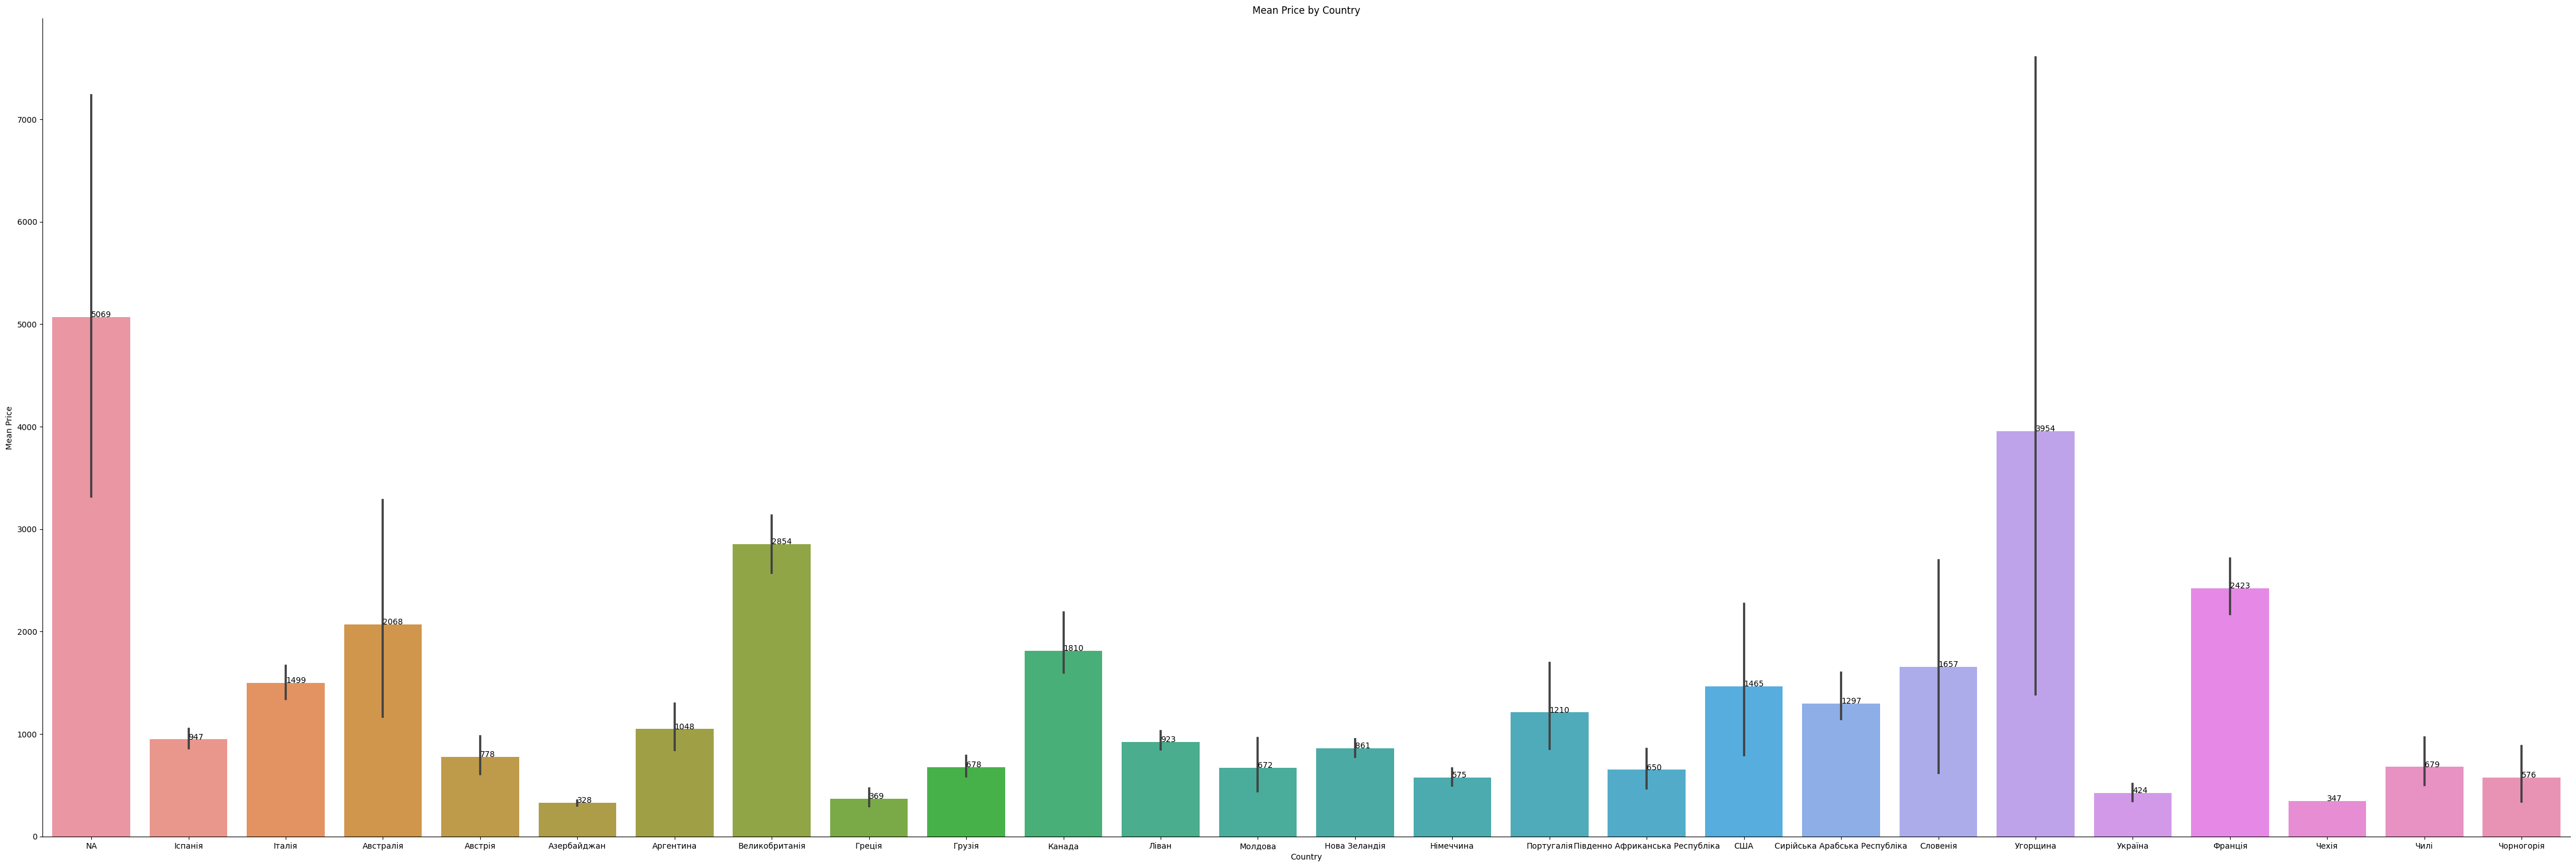

In [256]:
B_S = sns.catplot(x='Country', y='Price', data=df, kind='bar',  height=15, aspect=3)
for ax in B_S.axes.flat:
    for p in ax.patches:
        x_coord = p.get_x() + 0.5 * p.get_width()
        value = p.get_height()
        ax.annotate(f'{value:.0f}', (x_coord, value), ha='left')
plt.xlabel('Country')
plt.ylabel('Mean Price')
plt.title('Mean Price by Country')

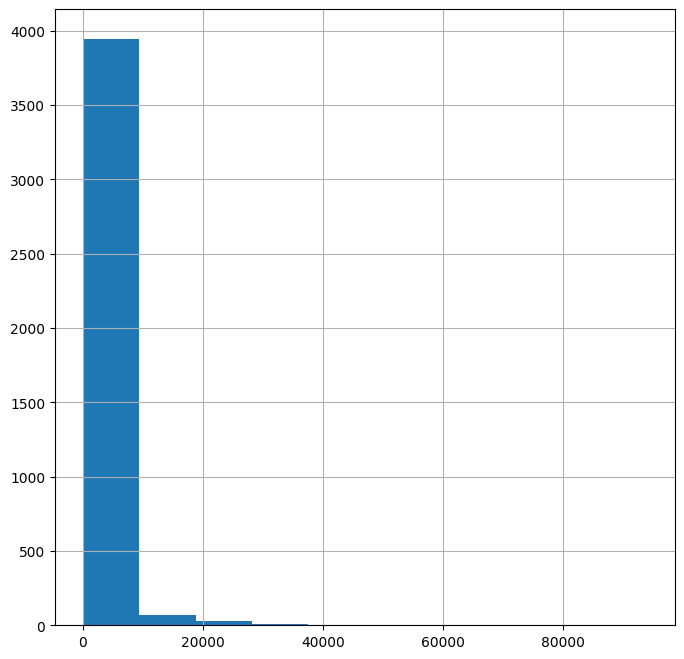

In [257]:
plt.figure(figsize=(8, 8))
df['Price'].hist();

In [258]:
df['Price'] = (df['Price']).apply(np.log)

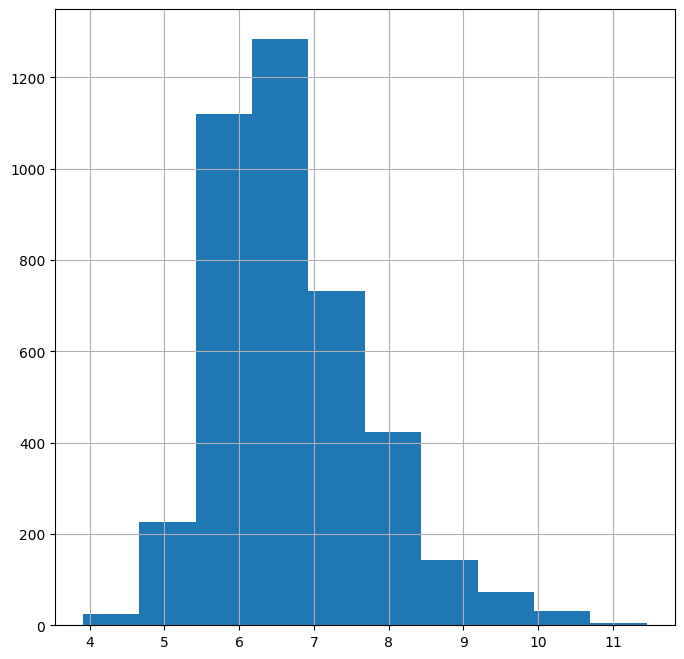

In [259]:
plt.figure(figsize=(8, 8))
df['Price'].hist();

Prepare text features

In [260]:
# df['Text_Description'] = df[['Technology',
#                              'Soil',
#                              'Serve_with',
#                              'Classification',
#                              'Vineyards_placement',
#                              'Endurance',
#                              'Harvest',
#                              'Additional_color',
#                              'Aroma',
#                              'Taste',
#                              'Interesting',
#                              'Potential',
#                              'Degustations']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [261]:
# df['Text_Description']

In [262]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [263]:
# vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')

In [264]:
# transformed_texts = vectorizer.fit_transform(df['Text_Description'])

In [265]:
# transformed_texts_df = pd.DataFrame(transformed_texts.todense(), columns=vectorizer.get_feature_names_out())

In [266]:
# transformed_texts_df.info()

In [267]:
# df = pd.concat([df, transformed_texts_df], axis=1)

In [268]:
# df.info()

In [269]:
df_selected = df[numerical+target+categorical]

In [270]:
df_selected = pd.get_dummies(df_selected, columns=categorical, drop_first=True)

In [271]:
df

,Title,Producer,Vendor_code,Price,Temperature,Grape,Technology,Volume,Year,Brand,...,Classification_Category,Grape_1,Grape_2,Grape_3,Grape_4,Grape_5,Grape_6,Grape_7,Grape_8,Grape_9
0,Вино сухе біле Dominio de Punctum Viento Alise...,Dominio de Punctum,15055373,6.084499,8,[віоньє],Вино виробляють за принципами «живого» господа...,0.75,2022.0,Dominio de Punctum,...,Region,віоньє,NA,NA,NA,NA,NA,NA,NA,NA
1,Вино напівсолодке червоне Castelnuovo Vino Ros...,Castelnuovo,10369400,5.379897,14-15,"[корвіна, рондінелла]",NaN,0.75,2019.0,Castelnuovo,...,NA,корвіна,рондінелла,NA,NA,NA,NA,NA,NA,NA
2,"Вино сухе червоне Vintae El Picaro 0,75 л",Vintae,15426282,6.322565,16-18,[тінта де торо],Біодинамічний спосіб ведення господарства. Фер...,0.75,2022.0,Vintae,...,Best,тінта де торо,NA,NA,NA,NA,NA,NA,NA,NA
3,Вино сухе біле Dominio de Punctum Viento Alise...,Dominio de Punctum,15055373,6.084499,8,[віоньє],Вино виробляють за принципами «живого» господа...,0.75,2022.0,Dominio de Punctum,...,Region,віоньє,NA,NA,NA,NA,NA,NA,NA,NA
4,Вино напівсолодке червоне Castelnuovo Vino Ros...,Castelnuovo,10369400,5.379897,14-15,"[корвіна, рондінелла]",NaN,0.75,2019.0,Castelnuovo,...,NA,корвіна,рондінелла,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,"Вино сухе червоне Grande Vallee Мерло 0,75 л",Grande Vallee,16652921,4.990433,16-18,[мерло],NaN,0.75,2015.0,Grande Vallee,...,NA,мерло,NA,NA,NA,NA,NA,NA,NA,NA
4068,"Вино сухе червоне E.Guigal Hermitage Rouge 0,75 л",E.Guigal,15291774,7.671827,16-18,[сіра],"Виноград, зібраний зі 30-річних лоз, піддають ...",0.75,2009.0,E.Guigal,...,Best,сіра,NA,NA,NA,NA,NA,NA,NA,NA
4069,Вино сухе червоне Вино LPDT Lucien Lurton Lа R...,La Passion des Terroirs,14493130,6.135565,16-17,[мерло],NaN,0.75,2012.0,La Passion des Terroirs,...,Best,мерло,NA,NA,NA,NA,NA,NA,NA,NA
4070,Вино сухе червоне E.Guigal Cote-Rotie Brune & ...,E.Guigal,15291786,8.188689,16-18,"[сіра, віоньє]","Середній вік лоз, з яких виготовляють вино, ся...",1.50,2009.0,E.Guigal,...,Best,сіра,віоньє,NA,NA,NA,NA,NA,NA,NA


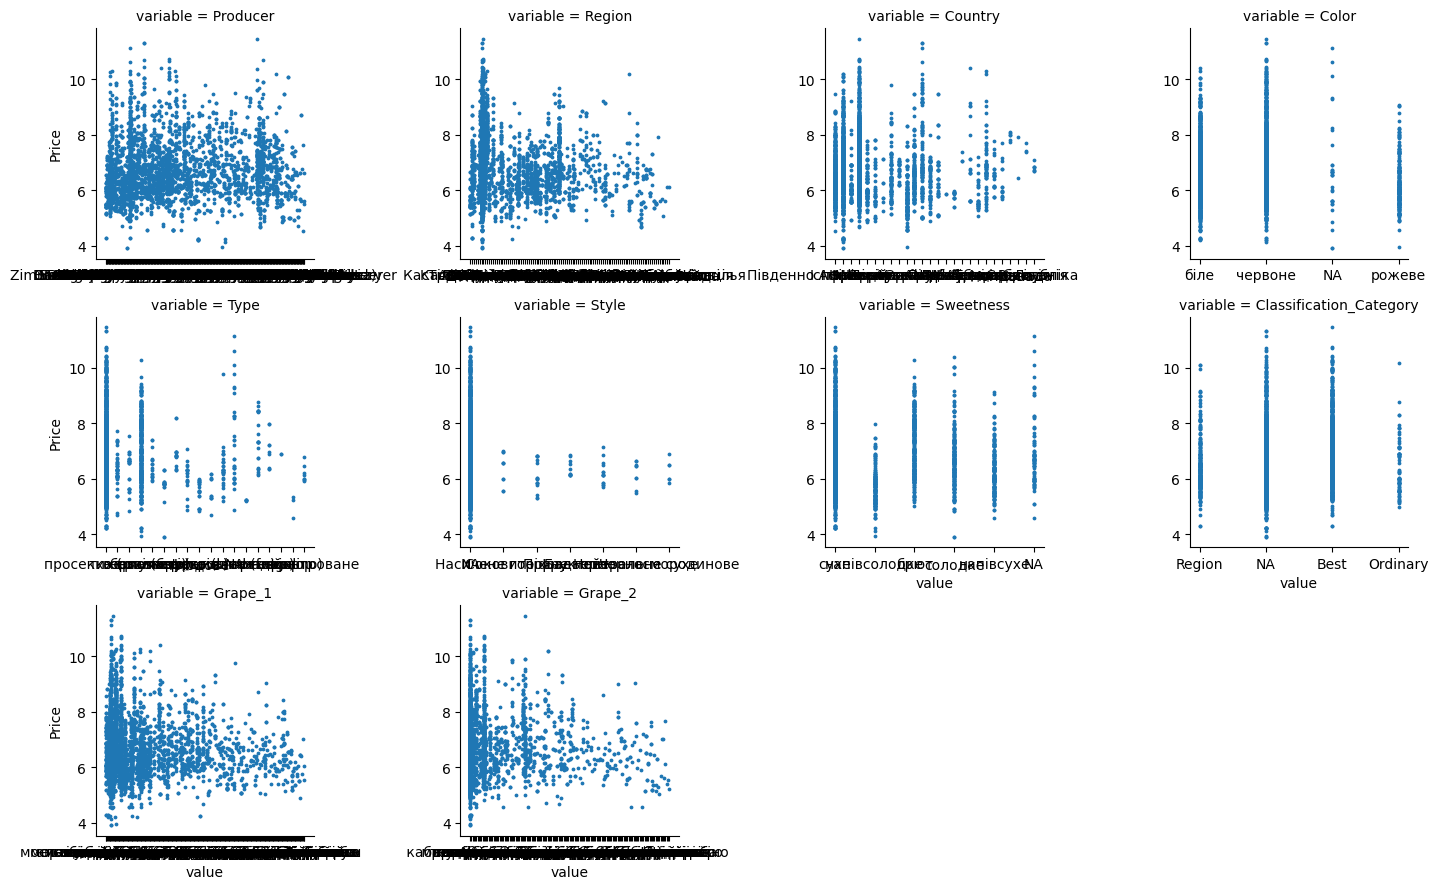

In [272]:
# sns.pairplot(df_selected[numerical]);
temp = pd.melt(df, id_vars=['Price'],value_vars=categorical)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=4,
                     aspect=1.2,sharex=False, sharey=False)
grid.map(plt.scatter, "value",'Price', s=3)
plt.show()

In [273]:
X_train, X_test, y_train, y_test = train_test_split(
    df_selected.drop(['Price'], axis=1),
    df_selected['Price'],
    test_size=0.25,
    random_state=42
)

In [274]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 2378 to 1456
Columns: 905 entries, Alcohol to Grape_2_NA
dtypes: float64(4), uint8(901)
memory usage: 934.6 KB


In [275]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_numeric = scaler.fit_transform(X_train[numerical])
X_test_scaled_numeric = scaler.transform(X_test[numerical])

X_train[numerical] = X_train_scaled_numeric
X_test[numerical] = X_test_scaled_numeric

Additiona functions to show metrics

In [276]:
from sklearn import metrics
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)),
       np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))),
       metrics.r2_score(np.exp(y_test), np.exp(y_pred)),
       mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))
    ]
    return stats
measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

""
error_type
MAE
RMSE
R2
MAPE


Our baseline will be just mean value

In [277]:
y_mean = np.mean(y_train)
y_pred_naive = np.ones(len(y_test)) * y_mean
y_pred_naive[:5]

array([6.72126541, 6.72126541, 6.72126541, 6.72126541, 6.72126541])

In [278]:
measured_metrics["naive"] = dataframe_metrics(y_test, y_pred_naive)
measured_metrics

,error_type,naive
0,MAE,1316.632166
1,RMSE,4482.624008
2,R2,-0.040911
3,MAPE,93.010235


Next try to use plain linear regression

In [279]:
X_train

,Alcohol,Sweet,Year,Volume,Producer_1924 Wines,Producer_46 Parallel,Producer_Abbazia di Novacella,Producer_Advini,Producer_Agenor Wine,Producer_Agricola Marchesi Mazzei,...,Grape_2_ чорний коринф,Grape_2_ чінурі,Grape_2_ шардоне,Grape_2_ шарелло,Grape_2_ шенен блан,Grape_2_ шираз,Grape_2_ шойребе,Grape_2_ інзолія,Grape_2_ іршаї олівер,Grape_2_NA
1258,0.062753,-0.272825,0.586667,-0.05436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2749,-0.051167,-0.326531,0.366991,-0.05436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3078,-0.335967,-0.299678,-0.951063,-0.05436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,-0.335967,-0.272825,-2.488793,-0.05436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1421,0.803234,-0.299678,0.586667,-0.05436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-0.620767,-0.272825,0.586667,-0.05436,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1294,0.518434,0.138028,-0.072360,-0.05436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1.372834,-0.221804,-0.072360,-0.05436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3510,0.233633,-0.272825,-1.170739,-0.05436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [280]:
# from sklearn.linear_model import LinearRegression

# model_regression = LinearRegression()

# model_regression.fit(X_train, y_train)

# y_pred_regr = model_regression.predict(X_test)

# measured_metrics["simple_linreg"] = dataframe_metrics(y_test, y_pred_regr)
# measured_metrics

In [281]:
# featureImportance = pd.DataFrame({"feature": df.drop(target,axis=1).columns,
#                                   "importance": model_regression.coef_})

# featureImportance.set_index('feature', inplace=True)
# featureImportance.sort_values(["importance"], ascending=False, inplace=True)
# featureImportance["importance"].plot('bar', figsize=(10, 6));

In [282]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     KFold)

n_folds=3

cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)

Next try to regularize with Lasso

In [283]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=cv, random_state=42)

lasso_cv.fit(X_train, y_train)
print('Best lasso:', lasso_cv.alpha_)
y_pred_lasso = lasso_cv.predict(X_test)


# featureImportance = pd.DataFrame({"feature": df.drop(target,axis=1).columns,
#                                   "importance": lasso_cv.coef_})

# featureImportance.set_index('feature', inplace=True)
# featureImportance.sort_values(["importance"], ascending=False, inplace=True)
# featureImportance["importance"].plot('bar', figsize=(10, 6));


measured_metrics["lasso_cv"] = dataframe_metrics(y_test, y_pred_lasso)
measured_metrics

Best lasso: 0.0003982869277993311


,error_type,naive,lasso_cv
0,MAE,1316.632166,1063.017128
1,RMSE,4482.624008,4169.771960
2,R2,-0.040911,0.099314
3,MAPE,93.010235,56.099967


Try to use Elastic net

In [284]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(cv=cv, random_state=42)
elastic_cv.fit(X_train, y_train)

y_pred_elastic = elastic_cv.predict(X_test)

In [285]:
# featureImportance = pd.DataFrame({"feature": X_test.columns,
#                                   "importance": elastic_cv.coef_})

# featureImportance.set_index('feature', inplace=True)
# featureImportance.sort_values(["importance"], ascending=False, inplace=True)
# featureImportance["importance"]
# featureImportance["importance"].plot(kind='bar', figsize=(10, 12));


measured_metrics["elastic_cv"] = dataframe_metrics(y_test, y_pred_elastic)
measured_metrics

,error_type,naive,lasso_cv,elastic_cv
0,MAE,1316.632166,1063.017128,1075.738863
1,RMSE,4482.624008,4169.771960,4223.256121
2,R2,-0.040911,0.099314,0.076060
3,MAPE,93.010235,56.099967,56.217935


In [286]:
from xgboost import XGBRegressor

import xgboost as xgb

num_rounds = 10000

xgb_train = xgb.DMatrix(X_train, y_train, feature_names=list(X_train.columns.values))

parameters = {
    #default
    "eta": 0.3,
    "verbosity": 0,
    "nthread": 10,
    "random_seed": 42,

    # regularization parameters
    "max_depth": 25
}

results = xgb.cv(parameters, xgb_train, num_rounds, early_stopping_rounds=10,
                 folds=cv, verbose_eval=10)

[0]	train-rmse:0.79323+0.00576	test-rmse:0.86669+0.00289
[10]	train-rmse:0.15107+0.00584	test-rmse:0.64924+0.03210
[20]	train-rmse:0.10492+0.00430	test-rmse:0.64312+0.03386
[30]	train-rmse:0.09577+0.00335	test-rmse:0.64101+0.03367
[40]	train-rmse:0.09170+0.00393	test-rmse:0.64009+0.03384
[50]	train-rmse:0.08795+0.00464	test-rmse:0.63965+0.03436
[60]	train-rmse:0.08590+0.00476	test-rmse:0.63911+0.03443
[70]	train-rmse:0.08472+0.00489	test-rmse:0.63905+0.03458
[77]	train-rmse:0.08404+0.00485	test-rmse:0.63917+0.03459


In [287]:
xgb_model = xgb.XGBRegressor(**parameters, random_state=42, n_rounds=77)

In [288]:
xgb_model.fit(X_train, y_train)
y_pred_xgb_regressor = xgb_model.predict(X_test)


measured_metrics["xgb_regressor"] = dataframe_metrics(y_test, y_pred_xgb_regressor)
measured_metrics

,error_type,naive,lasso_cv,elastic_cv,xgb_regressor
0,MAE,1316.632166,1063.017128,1075.738863,663.959524
1,RMSE,4482.624008,4169.771960,4223.256121,2802.594270
2,R2,-0.040911,0.099314,0.076060,0.593117
3,MAPE,93.010235,56.099967,56.217935,39.029760


In [ ]:
# y_pred_final = (y_pred_lasso + y_pred_xgb_regressor)/2

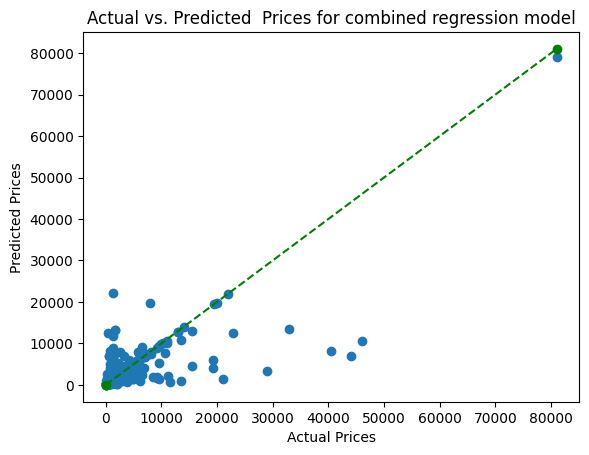

In [ ]:
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_regressor))
plt.plot([0,max(np.exp(y_test))], [0, max(np.exp(y_test))], "go--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted  Prices for combined regression model")
plt.show()

In [ ]:
!pip install eli5

In [ ]:
# from eli5.sklearn import explain_weights_sklearn
from eli5.formatters import format_as_dataframe, format_as_dataframes, format_as_text

from eli5.xgboost import explain_weights

In [ ]:
explanation = explain_weights(xgb_model, top=1500)

weights = format_as_dataframe(explanation)
weights

,feature,weight
0,Region_Шампань,0.097812
1,Sweetness_брют,0.031306
2,Country_Україна,0.029465
3,Grape_2_ санджовезе,0.023422
4,Producer_LD Vins,0.018943
...,...,...
897,Grape_2_ мальвазія дель лаціо,0.000000
898,Country_Сирійська Арабська Республіка,0.000000
899,Country_Словенія,0.000000
900,Grape_2_ мальвазія бьянка,0.000000


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

In [ ]:
# ## Define Grid
# grid = {
#     'n_estimators': [200,300,400,500],
#     'max_features': ['sqrt','log2'],
#     'max_depth' : [3,4,5,6,7],
#     'random_state' : [18]
# }
# ## Grid Search function
# CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
# CV_rfr.fit(X_train, y_train)

In [ ]:
# {'max_depth': 7,
#  'max_features': 'sqrt',
#  'n_estimators': 300,
#  'random_state': 18}
# # Create and train model
# rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
# rf.fit(x_train, y_train)
# # Predict on test data
# prediction = rf.predict(x_test)
# # Compute mean squared error
# mse = mean_squared_error(y_test, prediction)
# # Print results
# print(mse)
# print(mse^.5)

In [ ]:
# import lightgbm as ltb

In [ ]:
# lgbm = ltb.LGBMRegressor()
# lgbm.fit(X_train, y_train)

# y_pred_lgbm_regressor = lgbm.predict(X_test)


# measured_metrics["lgbm_regressor"] = dataframe_metrics(y_test, y_pred_lgbm_regressor)
# measured_metrics

In [ ]:
# feature_names = weights[weights['weight'] > 0.003]
# len(feature_names)

In [ ]:
# X_train[feature_names['feature']]

In [ ]:
# xgb_train = xgb.DMatrix(X_train[feature_names['feature']], y_train, feature_names=list(X_train[feature_names['feature']].columns.values))

# parameters = {
#     #default
#     "eta": 0.1,
#     "verbosity": 0,
#     "nthread": 10,
#     "random_seed": 42,

#     # regularization parameters
#     "max_depth": 18
# }

# results = xgb.cv(parameters, xgb_train, num_rounds, early_stopping_rounds=10,
#                  folds=cv, verbose_eval=10)

In [ ]:
# xgb_model_reduced = xgb.XGBRegressor(**parameters, random_state=42, n_rounds=67)
# xgb_model_reduced.fit(X_train[feature_names['feature']], y_train)

In [ ]:
# y_pred_xgb_regressor_reduced = xgb_model_reduced.predict(X_test[feature_names['feature']])


# measured_metrics["xgb_regressor_reduced"] = dataframe_metrics(y_test, y_pred_xgb_regressor_reduced)
# measured_metrics

In [ ]:
# plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_regressor_reduced))
# plt.plot([0,max(np.exp(y_test))], [0, max(np.exp(y_test))], "go--")
# plt.xlabel("Actual Prices")
# plt.ylabel("Predicted Prices")
# plt.title("Actual vs. Predicted  Prices for combined regression model")
# plt.show()